In [1]:
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt

In [2]:
ds = gdal.Open('data/dem/north_mexico_clip.tif')
gt = ds.GetGeoTransform()

`ds` is an object of type `gdal.Dataset`. To see all the functions avaiable for this class; refer to the GDAL documentation

In [3]:
# (top_left_x_coord, x_resolution, row_rotation, top_left_y_coord, column_rotation, y_resolution)
# x_resolution => pixel width
# y_resolution => pixel height (usually negative)
# row_rotation, column_rotation are usually 0 (zero)
gt

(978102.0, 3.0, 0.0, 3420441.0, 0.0, -3.0)

In [4]:
proj = ds.GetProjection()
proj

'PROJCS["NAD83 / UTM zone 15N",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4269"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-93],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","26915"]]'

In [6]:
f'Number of raster bands: {ds.RasterCount}'

'Number of raster bands: 1'

In [7]:
f'Raster size: {ds.RasterXSize} rows, {ds.RasterYSize} columns'

'Raster size: 7812 rows, 6089 columns'

In [5]:
band = ds.GetRasterBand(1) # non-zero based index
band # gdal.Band object

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x7f2b04e89930> >

In [6]:
array = band.ReadAsArray()
type(array)

numpy.ndarray

In [7]:
array = array.astype(np.int16) # convert values from float to int

In [20]:
array.max()

76

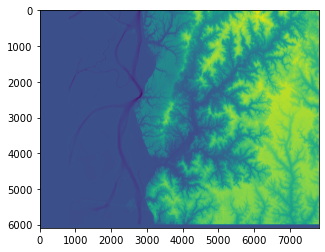

In [21]:
plt.figure()
plt.imshow(array, vmin=-26, vmax=80, )

#### Creating a Binary Mask
A binary mask is a raster in which the pixel values are either 0 or 1. Such rasters can represent a variable of interest. In order to generate such raster a threshold or condition must be set in order to determine if the pixels belong or not to that variable or class.

In the example above, the pixels whose value is above the rasters mean value, they are assigned the value 1, and 0 for those whose value is below the mean

In [8]:
binmask = np.where((array >= np.mean(array)), 1, 0)

In [26]:
binmask.min()

0

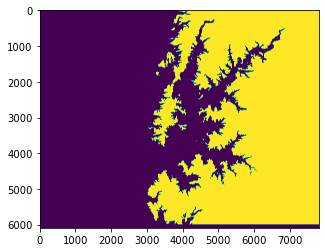

In [29]:
fig, ax = plt.subplots()
plt.imshow(binmask)

#### Create new raster and save it as file

In [22]:
driver = gdal.GetDriverByName('GTiff')
driver.Register()
ysize, xsize = binmask.shape
out_ds = driver.Create('output/binmask.tif', xsize=xsize, ysize=ysize, bands=1, eType=gdal.GDT_Float32)
out_ds.SetGeoTransform(gt)
out_ds.SetProjection(proj)
out_band = out_ds.GetRasterBand(1)
out_band.WriteArray(binmask)
out_band.SetNoDataValue(np.nan)
out_band.FlushCache()

In [11]:
out_band = None

In [34]:
xsize, ysize = binmask.shape

In [36]:
ysize

7812

In [12]:
new_ds = gdal.Open('output/binmask.tif')
band = new_ds.GetRasterBand(1)

In [24]:
out_array = out_band.ReadAsArray()
out_array = out_array.astype(np.int32)

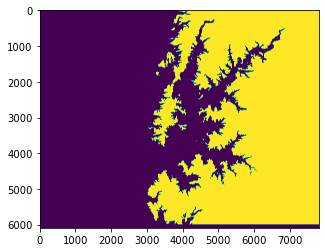

In [28]:
plt.figure()
plt.imshow(out_array)

In [30]:
# Clean resources after saving
out_ds = None
new_ds = None
band = None
out_band = None
out_array = None